# 1) Pasos iniciales de un modelo predictivo

### 1.1) Importamos las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos
sns.set()
plt.rcParams["figure.figsize"] = (14,4) #tamaño gráficos

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Tranformacíon variables categóricas (encoding: pasar categorias a números)
from sklearn.preprocessing import MinMaxScaler, StandardScaler #Tranformacíon variables numéricas (normalización)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, plot_roc_curve, mean_squared_error #Métricas de error y para comparar modelos
from sklearn.feature_selection import chi2, f_classif
from sklearn import metrics, tree
from sklearn.linear_model import LogisticRegression #Modelo de Regresión Logística
from sklearn.neighbors import KNeighborsClassifier #Modelo tipo kNN
from sklearn.tree import DecisionTreeClassifier #Modelo tipo árbol de decisión

from sklearn.model_selection import train_test_split #separación train y test

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### 1.2) Importamos los datasets

In [2]:
tls201 = pd.read_excel('/Users/jorgeblasco/Desktop/tfg/bbdd/PATSTAT_Sample_2022Spring_CSV/Datos xlsx/tls/tls201_appln.xlsx')

### 1.3) Importamos las bases de Train y Test

In [3]:
# Modelo de regresion logistica. Seleccionamos las características para enternar el modelo y la variable objetivo
X = tls201[['appln_auth', 'appln_kind', 'appln_filing_year', 'ipr_type', 'nat_phase', 'nb_applicants']]
y = tls201['granted']

In [4]:
# Separar el dataset en train y test. 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Asignar los conjuntos de entrenamiento y prueba a variables separadas
train_tls201 = pd.concat([X_train, y_train], axis=1)
test_tls201 = pd.concat([X_test, y_test], axis=1)

In [6]:
# train_tls201, variable en formato dataframe que contiene todas las variables del modelo (tanto las características como la variable objetivo) 
train_tls201[['appln_auth', 'appln_kind', 'appln_filing_year', 'ipr_type', 'nat_phase', 'granted', 'nb_applicants']]

appln_auth appln_kind  appln_filing_year ipr_type nat_phase granted  \
135347         US         A              2012.0       PI         Y       Y   
7350           CN         A              2008.0       PI         Y       Y   
115817         US         A              1981.0       PI         Y       Y   
89428          FR         A              1985.0       PI         Y       Y   
122770         US         A              2004.0       PI         Y       Y   
...           ...        ...                ...      ...       ...     ...   
119879         US         A              1998.0       PI         Y       Y   
103694         KR         A              2014.0       PI         Y       Y   
131932         US         A              2010.0       PI         Y       N   
146867         US         A              2017.0       PI         Y       Y   
121958         US         A              2002.0       PI         Y       Y   

        nb_applicants  
135347              4  
7350                1  
115817              1  
89428               1  
122770              1  
...               ...  
119879              1  
103694              1  
131932              5  
146867              1  
121958              1  

[132081 rows x 7 columns]

In [7]:
# Tamaño del dataset de train y test
print('Train data size: ', train_tls201.shape)
print('Test data size: ', test_tls201.shape)

Train data size:  (132081, 7)
Test data size:  (33021, 7)


### 1.4) Observamos los datos

In [8]:
# Observamos los datos de train
train_tls201.head()

appln_auth appln_kind  appln_filing_year ipr_type nat_phase  \
135347         US         A              2012.0       PI         Y   
7350           CN         A              2008.0       PI         Y   
115817         US         A              1981.0       PI         Y   
89428          FR         A              1985.0       PI         Y   
122770         US         A              2004.0       PI         Y   

        nb_applicants granted  
135347              4       Y  
7350                1       Y  
115817              1       Y  
89428               1       Y  
122770              1       Y

In [9]:
# Observamos los datos de test
test_tls201.head()

appln_auth appln_kind  appln_filing_year ipr_type nat_phase  \
52112          CN         A              2019.0       PI         Y   
122786         US         A              2004.0       PI         Y   
123255         US         A              2004.0       PI         Y   
156386         WO         W              2011.0       PI         N   
97622          JP         A              2012.0       PI         Y   

        nb_applicants granted  
52112               1       N  
122786              0       Y  
123255              3       Y  
156386              5       N  
97622               1       Y

In [10]:
# Imprimimos las columnas que tiene el dataset
train_tls201.columns.tolist()

['appln_auth',
 'appln_kind',
 'appln_filing_year',
 'ipr_type',
 'nat_phase',
 'nb_applicants',
 'granted']

### 1.5) Comprobamos tipología de los datos

In [11]:
# Tipos de datos en train. Por ahora, todos son de tipo object excepto el año, que es de tipo float64
train_tls201.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132081 entries, 135347 to 121958
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   appln_auth         132081 non-null  object 
 1   appln_kind         132081 non-null  object 
 2   appln_filing_year  131127 non-null  float64
 3   ipr_type           132081 non-null  object 
 4   nat_phase          132081 non-null  object 
 5   nb_applicants      132081 non-null  int64  
 6   granted            132081 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ MB


In [12]:
# Tipos de datos en test
test_tls201.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33021 entries, 52112 to 11402
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   appln_auth         33021 non-null  object 
 1   appln_kind         33021 non-null  object 
 2   appln_filing_year  32790 non-null  float64
 3   ipr_type           33021 non-null  object 
 4   nat_phase          33021 non-null  object 
 5   nb_applicants      33021 non-null  int64  
 6   granted            33021 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ MB


In [13]:
# Analizamos la cantidad de observaciones por cada valor observado en cada columna
for col in train_tls201.columns.tolist():
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(train_tls201[col].value_counts(), '\n')

appln_auth 
--------------------
CN    51487
US    32308
WO     9874
EP     8689
JP     6722
      ...  
NI        1
IS        1
EC        1
EM        1
EG        1
Name: appln_auth, Length: 83, dtype: int64 

appln_kind 
--------------------
A     98287
U     21249
W      9872
T      2160
D2      242
F       130
D       114
P        20
E         6
K         1
Name: appln_kind, dtype: int64 

appln_filing_year 
--------------------
2018.0    12157
2017.0    12152
2019.0    10952
2016.0    10415
2015.0     9300
          ...  
1899.0        5
1903.0        4
1898.0        3
1897.0        1
1892.0        1
Name: appln_filing_year, Length: 126, dtype: int64 

ipr_type 
--------------------
PI    110690
UM     21261
DP       130
Name: ipr_type, dtype: int64 

nat_phase 
--------------------
Y    113439
N     18642
Name: nat_phase, dtype: int64 

nb_applicants 
--------------------
1     106744
2      10949
0       5691
3       3967
4       2425
5       1063
6        541
7        324
8     

Hay dos tipos de datos:
1. Datos Numéricos:
   - appln_filing_year
   - nb_applicants
2. Datos Categóricos:
   - appln_auth
   - appln_kind
   - ipr_type
   - nat_phase

### 1.6) Resumen estadístico

In [14]:
# Estadísticas de train, con el número de observaciones, las observaciones únicas, la primera observación, la observación más frecuente, la media, la desviación típica, el mínimo, la mediana y el máximo
train_tls201.describe(include='all', percentiles=[])

appln_auth appln_kind  appln_filing_year ipr_type nat_phase  \
count      132081     132081      131127.000000   132081    132081   
unique         83         10                NaN        3         2   
top            CN         A                 NaN       PI         Y   
freq        51487      98287                NaN   110690    113439   
mean          NaN        NaN        2010.933744      NaN       NaN   
std           NaN        NaN          12.663939      NaN       NaN   
min           NaN        NaN        1892.000000      NaN       NaN   
50%           NaN        NaN        2015.000000      NaN       NaN   
max           NaN        NaN        2021.000000      NaN       NaN   

        nb_applicants granted  
count   132081.000000  132081  
unique            NaN       2  
top               NaN       Y  
freq              NaN   79044  
mean         1.246568     NaN  
std          0.942522     NaN  
min          0.000000     NaN  
50%          1.000000     NaN  
max         24.000000     NaN

In [15]:
# Estadísticas de test
test_tls201.describe(include='all', percentiles=[])

appln_auth appln_kind  appln_filing_year ipr_type nat_phase  \
count       33021      33021       32790.000000    33021     33021   
unique         74          8                NaN        3         2   
top            CN         A                 NaN       PI         Y   
freq        12680      24637                NaN    27694     28449   
mean          NaN        NaN        2010.962885      NaN       NaN   
std           NaN        NaN          12.549971      NaN       NaN   
min           NaN        NaN        1877.000000      NaN       NaN   
50%           NaN        NaN        2015.000000      NaN       NaN   
max           NaN        NaN        2021.000000      NaN       NaN   

        nb_applicants granted  
count    33021.000000   33021  
unique            NaN       2  
top               NaN       Y  
freq              NaN   19680  
mean         1.254232     NaN  
std          0.953757     NaN  
min          0.000000     NaN  
50%          1.000000     NaN  
max         15.000000     NaN

### 1.7) Visualización de datos

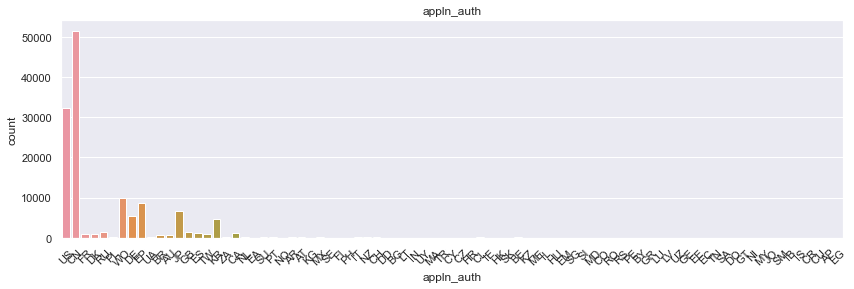

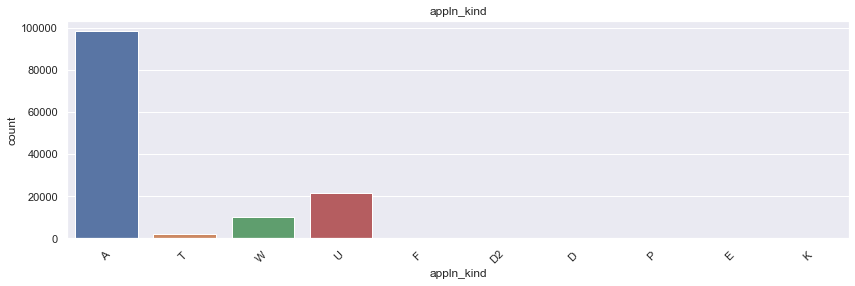

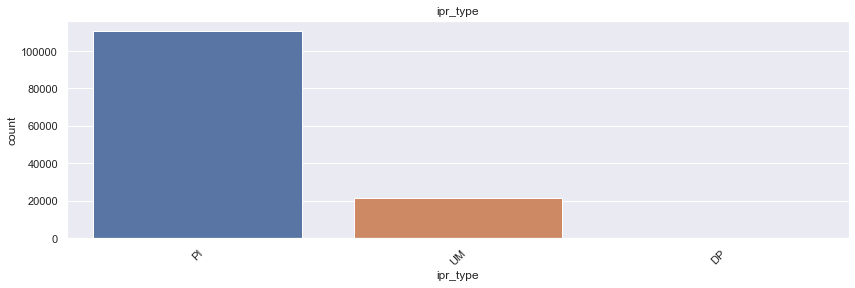

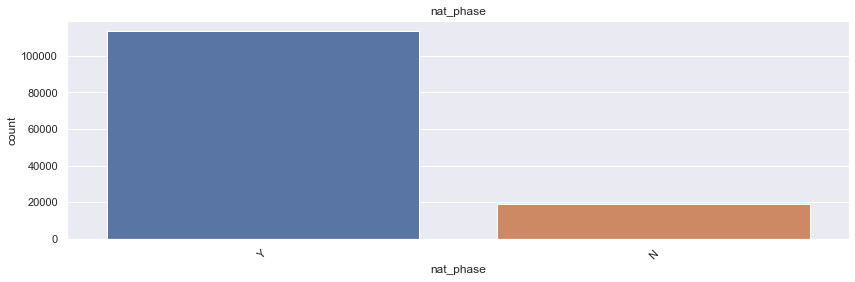

In [16]:
# Visualizamos los datos en gráficos de columnas
categorical = X_train.select_dtypes(include=['object']).columns.values

for col in categorical:
    #plt.figure(figsize=(8,4))
    sns.countplot(x=X_train[col], data=X_train)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

# 2) Procesamiento de datos previo al modelaje

### 2.1) Transformación de variables binarias
En este modelo, la única variable binaria es 'granted', la variable objetivo

In [17]:
# Aquí, especificamos la función que vamos a usar (binary_to_num), el valor categórico que queremos transformar ('N') y a lo que lo queremos transformar (0)
def binary_to_num(df, col):
  return np.where(df[col] == 'N', 0, 1)

In [18]:
# Asignamos el nuevo nombre a la variable 'granted', que ahora tendrá _num después del nombre original
for col in ['granted', 'nat_phase']:
  train_tls201[col + '_num'] = binary_to_num(train_tls201, col)
  test_tls201[col + '_num'] = binary_to_num(test_tls201, col)

In [19]:
# Antes del cambio de 'granted' y 'nat_phase' en train, vemos las siguientes observaciones
train_tls201['granted'].value_counts()

Y    79044
N    53037
Name: granted, dtype: int64

In [20]:
# Después del cambio de 'granted' y 'nat_phase' en train, vemos las siguientes observaciones
train_tls201['granted_num'].value_counts()

1    79044
0    53037
Name: granted_num, dtype: int64

### 2.2) Separación entre Variables Numéricas y Categóricas

In [21]:
# Hacemos una lista de las variables de train
train_tls201.columns.tolist()

['appln_auth',
 'appln_kind',
 'appln_filing_year',
 'ipr_type',
 'nat_phase',
 'nb_applicants',
 'granted',
 'granted_num',
 'nat_phase_num']

In [22]:
# Separamos entre variables numéricas y categóricas
# cat, dataframe de variables categóricas
# num, dataframe de variables numéricas
cat = train_tls201[['appln_auth', 'appln_kind', 'ipr_type', 'granted_num']]
num = train_tls201[['appln_filing_year', 'nat_phase_num', 'nb_applicants', 'granted_num']]

In [23]:
# Imprimimos el número de filas y columnas de cat y num
print('Datos categóricos: ', cat.shape)
print('Datos numéricos: ', num.shape)

Datos categóricos:  (132081, 4)
Datos numéricos:  (132081, 4)


### 2.3) Variables Numéricas como Input y Output Categórica

**Prueba: Chi-squared**

In [24]:
# Imprimimos las 5 primeras observaciones de cat
cat.head()

appln_auth appln_kind ipr_type  granted_num
135347         US         A        PI            1
7350           CN         A        PI            1
115817         US         A        PI            1
89428          FR         A        PI            1
122770         US         A        PI            1

In [25]:
# Dividimos el objeto cat en dos, el dataframe x_cat que será cat pero sin la variable objetivo y el dataframe y_cat que será la variable objetivo
category = cat.columns[:-1]
x_cat = cat[category]
y_cat = cat['granted_num']

In [26]:
# Transformamos todas las variables con valores categóricos a valores numéricos con LabelEncoder y OneHotEncoder
le = LabelEncoder()

x_cat['appln_auth'] = le.fit_transform(x_cat['appln_auth'])
x_cat['appln_kind'] = le.fit_transform(x_cat['appln_kind'])
x_cat['ipr_type'] = le.fit_transform(x_cat['ipr_type'])

# Creamos el objeto OneHotEncoder y lo ajustamos a los datos de entrenamiento
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(x_cat[category])

/var/folders/_4/xwcl9vb95vjfs12h6kbqfk440000gp/T/ipykernel_80143/2615057608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat['appln_auth'] = le.fit_transform(x_cat['appln_auth'])
/var/folders/_4/xwcl9vb95vjfs12h6kbqfk440000gp/T/ipykernel_80143/2615057608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat['appln_kind'] = le.fit_transform(x_cat['appln_kind'])
/var/folders/_4/xwcl9vb95vjfs12h6kbqfk440000gp/T/ipykernel_80143/2615057608.py:6: SettingWithCopyWarning: 
A value is trying to be set o

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
# Imprimimos las 5 primeras variables de x_cat, una vez se transformaron a valores numéricas
x_cat.head()

appln_auth  appln_kind  ipr_type
135347          78           0         1
7350            11           0         1
115817          78           0         1
89428           29           0         1
122770          78           0         1

In [28]:
x_cat.skew()

appln_auth    0.375461
appln_kind    1.157824
ipr_type      1.796236
dtype: float64

In [29]:
# Normalizamos los datos
x_catnorm = MinMaxScaler().fit_transform(x_cat)

In [30]:
# Calculamos chi-score y p_value
chi_score, pvalue = chi2(x_catnorm, y_cat)

for i in range(len(category)):
    print(str(category[i]) + ': ', pvalue[i])

appln_auth:  0.18203486495766963
appln_kind:  5.2477631922563235e-123
ipr_type:  5.654998991521943e-193


**Conclusión:**

Todas las variables categóricas son significantes ya que el P-Value < 0.05.

### 2.4) Variables Categóricas como Input y Output Categórica

**Prueba: ANOVA y prueba de Correlación**

In [31]:
# Para que los modelos no nos den error a la hora de leer los valores nulos, faltantes o flotantes, sustituiremos aquellos valores faltantes de la variable 'appln_filing_year' por 0 y, a continuacion, 
# los pasaremos a números enteros en vez de punto flotante
num['appln_filing_year'].fillna(0, inplace=True)
num['appln_filing_year']= num['appln_filing_year'].astype(int)

/var/folders/_4/xwcl9vb95vjfs12h6kbqfk440000gp/T/ipykernel_80143/3329266612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['appln_filing_year'].fillna(0, inplace=True)
/var/folders/_4/xwcl9vb95vjfs12h6kbqfk440000gp/T/ipykernel_80143/3329266612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['appln_filing_year']= num['appln_filing_year'].astype(int)


In [32]:
# Imprimimos las 5 primeras variables de num
num.head()

appln_filing_year  nat_phase_num  nb_applicants  granted_num
135347               2012              1              4            1
7350                 2008              1              1            1
115817               1981              1              1            1
89428                1985              1              1            1
122770               2004              1              1            1

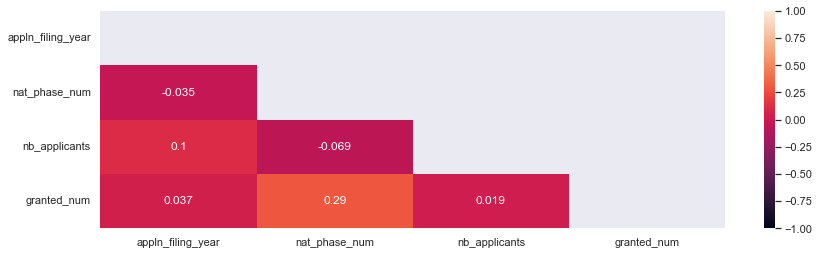

In [33]:
# Realizamos el test de correlación
mask = np.triu(np.ones_like(num.corr(), dtype=bool))
sns.heatmap(num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

In [34]:
# ANOVA
num.skew()

appln_filing_year   -11.543643
nat_phase_num        -2.061447
nb_applicants         4.546881
granted_num          -0.401672
dtype: float64

In [35]:
# Dividimos el objeto num en dos, el dataframe x_num que será num pero sin la variable objetivo y el dataframe y_num que será la variable objetivo
numeric = num.columns[:-1]
x_num = num[numeric]
y_num = num['granted_num']

In [36]:
# Imprimimos las 5 primeras variables de x_num
x_num.head()

appln_filing_year  nat_phase_num  nb_applicants
135347               2012              1              4
7350                 2008              1              1
115817               1981              1              1
89428                1985              1              1
122770               2004              1              1

In [37]:
# Normalizamos los datos
x_numnorm = MinMaxScaler().fit_transform(x_num)

In [38]:
# Calculamos chi-score y p_value (no funciona porque no permite valores NaN)
f_score, p_value = f_classif(x_numnorm, y_num)

for i in range(len(numeric)):
    print(numeric[i], ': ', p_value[i])

appln_filing_year :  1.0956300209801883e-40
nat_phase_num :  0.0
nb_applicants :  1.4249320945054563e-11


# 3) Procesamiento de datos para modelar

### 3.1) Reorganización de columnas

In [39]:
# Imprimimos las 5 primeras observaciones de train_tls201
train_tls201.head()

appln_auth appln_kind  appln_filing_year ipr_type nat_phase  \
135347         US         A              2012.0       PI         Y   
7350           CN         A              2008.0       PI         Y   
115817         US         A              1981.0       PI         Y   
89428          FR         A              1985.0       PI         Y   
122770         US         A              2004.0       PI         Y   

        nb_applicants granted  granted_num  nat_phase_num  
135347              4       Y            1              1  
7350                1       Y            1              1  
115817              1       Y            1              1  
89428               1       Y            1              1  
122770              1       Y            1              1

In [40]:
# Imprimimos un array de la lista de todas las columnas de train_tls201
train_tls201.columns.values

array(['appln_auth', 'appln_kind', 'appln_filing_year', 'ipr_type',
       'nat_phase', 'nb_applicants', 'granted', 'granted_num',
       'nat_phase_num'], dtype=object)

In [41]:
# Reorganizamos las columnas para mayor facilidad. train_tls201_data y test_tls201_data es el mismo dataframe pero con las columnas organizadas
columns_reorg = ['appln_auth',  'appln_kind', 'appln_filing_year', 'ipr_type', 'nb_applicants', 'nat_phase', 'granted', 'nat_phase_num', 'granted_num']

train_tls201_data = train_tls201[columns_reorg]

test_tls201_data = test_tls201[columns_reorg]

train_tls201_data.head()

appln_auth appln_kind  appln_filing_year ipr_type  nb_applicants  \
135347         US         A              2012.0       PI              4   
7350           CN         A              2008.0       PI              1   
115817         US         A              1981.0       PI              1   
89428          FR         A              1985.0       PI              1   
122770         US         A              2004.0       PI              1   

       nat_phase granted  nat_phase_num  granted_num  
135347         Y       Y              1            1  
7350           Y       Y              1            1  
115817         Y       Y              1            1  
89428          Y       Y              1            1  
122770         Y       Y              1            1

### 3.2) Separamos la variable objetivo ('granted')

In [42]:
x_train = train_tls201_data[['appln_auth',	'appln_kind',	'appln_filing_year', 'ipr_type', 'nb_applicants', 'nat_phase_num']]
y_train = train_tls201_data['granted_num']
x_test = test_tls201_data[['appln_auth',	'appln_kind',	'appln_filing_year']]
y_test = test_tls201_data['granted_num']
y_train.value_counts()

1    79044
0    53037
Name: granted_num, dtype: int64

### 3.3) Creamos el dataframe definitivo para modelar

In [43]:
# Agregamos la columna 'index', que será común para x_cat y x_num
x_cat = x_cat.reset_index()
x_num = x_num.reset_index()

In [44]:
# Aquí concatenamos x_cat y x_num en un dataframe llamado x_unido, y de este dataframe nos quedaremos con las columnas que nos interesan
x_unido = pd.concat([x_cat, x_num], axis=1)
x_unido = x_unido[['appln_auth', 'appln_kind', 'appln_filing_year', 'ipr_type', 'nb_applicants', 'nat_phase_num']]

In [45]:
# Imprimimos las 5 primeras observaciones de x_unido
x_unido.head()

appln_auth  appln_kind  appln_filing_year  ipr_type  nb_applicants  \
0          78           0               2012         1              4   
1          11           0               2008         1              1   
2          78           0               1981         1              1   
3          29           0               1985         1              1   
4          78           0               2004         1              1   

   nat_phase_num  
0              1  
1              1  
2              1  
3              1  
4              1

# 4) Aplicamos los modelos de predicción

### 4.1) Árbol de decisión

In [46]:
# Arbol de decisión
arboldecision = tree.DecisionTreeClassifier()
arboldecision = arboldecision.fit(x_unido, y_train)
y_prediccion_ad = arboldecision.predict(x_unido)

# Matriz de confusión
matriz_confusion_ad = confusion_matrix(y_train, y_prediccion_ad)
print("Matriz de confusión:\n", matriz_confusion_ad)

# Reporte de clasificación
reporte_clasificacion_ad = classification_report(y_train, y_prediccion_ad)
print("Reporte de clasificación:\n", reporte_clasificacion_ad)

Matriz de confusión:
 [[37890 15147]
 [11211 67833]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74     53037
           1       0.82      0.86      0.84     79044

    accuracy                           0.80    132081
   macro avg       0.79      0.79      0.79    132081
weighted avg       0.80      0.80      0.80    132081



### 4.2) Regresión logística

In [47]:
# Regresión logística
regresionlogistica = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
regresionlogistica = regresionlogistica.fit(x_unido, y_train)
y_prediccion_rl = regresionlogistica.predict(x_unido)

# Precisión, exhaustividad, puntuación F1 y exactitud
precision_rl = precision_score(y_train, y_prediccion_rl)
recall_rl = recall_score(y_train, y_prediccion_rl)
f1_rl = f1_score(y_train, y_prediccion_rl)
exactitud_rl = accuracy_score(y_train, y_prediccion_rl)

print("Precisión:", precision_rl)
print("Exhaustividad:", recall_rl)
print("Puntuación F1:", f1_rl)
print("Exactitud:", exactitud_rl)

Precisión: 0.7558479532163743
Exhaustividad: 0.732554020545519
Puntuación F1: 0.7440187084007914
Exactitud: 0.6983366267669082


### 4.3) KNN

In [48]:
# KNN vecinos más cercanos
neighbors = KNeighborsClassifier(n_neighbors=8)
neighbors = neighbors.fit(x_unido, y_train)
y_prediccion_knn = neighbors.predict(x_unido)

# Precisión, exhaustividad, puntuación F1 y exactitud
precision_knn = precision_score(y_train, y_prediccion_knn)
recall_knn = recall_score(y_train, y_prediccion_knn)
f1_knn = f1_score(y_train, y_prediccion_knn)
exactitud_knn = accuracy_score(y_train, y_prediccion_knn)

print("Precisión:", precision_knn)
print("Exhaustividad:", recall_knn)
print("Puntuación F1:", f1_knn)
print("Exactitud:", exactitud_knn)

Precisión: 0.831577666292545
Exhaustividad: 0.7779970649258641
Puntuación F1: 0.8038955521422267
Exactitud: 0.772843936675222
